# Predictive Modeling on Student Performance

Import Required Libraries

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

Load Dataset

In [9]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Basic Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Define Target & Features

In [14]:
X = df.drop(columns=["math score"])
y = df["math score"]

Categorical & Numerical Columns

In [16]:
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

numerical_cols = [
    "reading score",
    "writing score"
]

Preprocessing Pipeline

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

In [19]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'),
                                 ['gender', 'race/ethnicity',
                                  'parental level of education', 'lunch',
                                  'test preparation course']),
                                ('num', StandardScaler(),
                                 ['reading score', 'writing score'])])

Train–Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: Logistic Regression

In [23]:
y_train_bin = (y_train >= 50).astype(int)
y_test_bin = (y_test >= 50).astype(int)

log_reg = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

log_reg.fit(X_train, y_train_bin)
y_pred_lr = log_reg.predict(X_test)

Evaluation – Logistic Regression

In [25]:
print("Logistic Regression")
print("Accuracy :", accuracy_score(y_test_bin, y_pred_lr))
print("Precision:", precision_score(y_test_bin, y_pred_lr))
print("Recall   :", recall_score(y_test_bin, y_pred_lr))
print("F1 Score :", f1_score(y_test_bin, y_pred_lr))

Logistic Regression
Accuracy : 0.9
Precision: 0.9244186046511628
Recall   : 0.9578313253012049
F1 Score : 0.9408284023668639


Actual vs Predicted – Logistic Regression

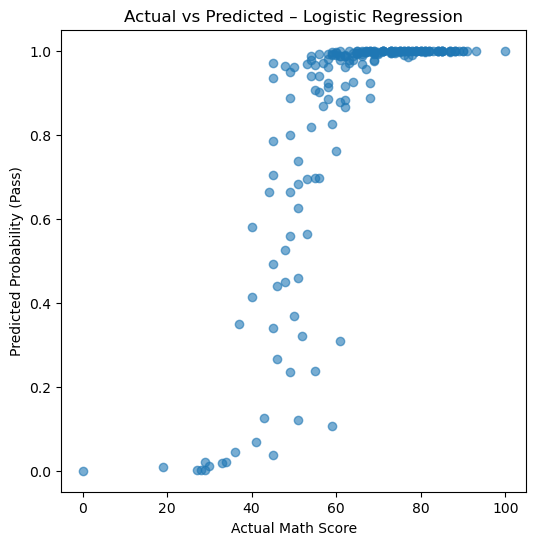

In [27]:
y_pred_lr_prob = log_reg.predict_proba(X_test)[:, 1]

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr_prob, alpha=0.6)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Probability (Pass)")
plt.title("Actual vs Predicted – Logistic Regression")
plt.show()

# Model 2: Decision Tree

In [29]:
dt_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", DecisionTreeRegressor(random_state=42))
    ]
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

Evaluation – Decision Tree

In [31]:
y_pred_dt_bin = (y_pred_dt >= 50).astype(int)

print("Decision Tree")
print("Accuracy :", accuracy_score(y_test_bin, y_pred_dt_bin))
print("Precision:", precision_score(y_test_bin, y_pred_dt_bin))
print("Recall   :", recall_score(y_test_bin, y_pred_dt_bin))
print("F1 Score :", f1_score(y_test_bin, y_pred_dt_bin))

Decision Tree
Accuracy : 0.89
Precision: 0.9235294117647059
Recall   : 0.9457831325301205
F1 Score : 0.9345238095238095


Actual vs Predicted – Decision Tree

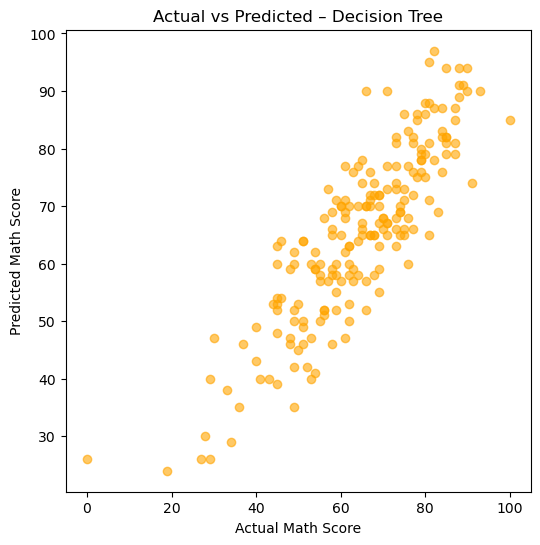

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color="orange")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted – Decision Tree")
plt.show()

# Model 3: Random Forest

In [35]:
rf_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=100,
            random_state=42
        ))
    ]
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Evaluation – Random Forest

In [37]:
y_pred_rf_bin = (y_pred_rf >= 50).astype(int)

print("Random Forest")
print("Accuracy :", accuracy_score(y_test_bin, y_pred_rf_bin))
print("Precision:", precision_score(y_test_bin, y_pred_rf_bin))
print("Recall   :", recall_score(y_test_bin, y_pred_rf_bin))
print("F1 Score :", f1_score(y_test_bin, y_pred_rf_bin))

Random Forest
Accuracy : 0.89
Precision: 0.9235294117647059
Recall   : 0.9457831325301205
F1 Score : 0.9345238095238095


Actual vs Predicted – Random Forest

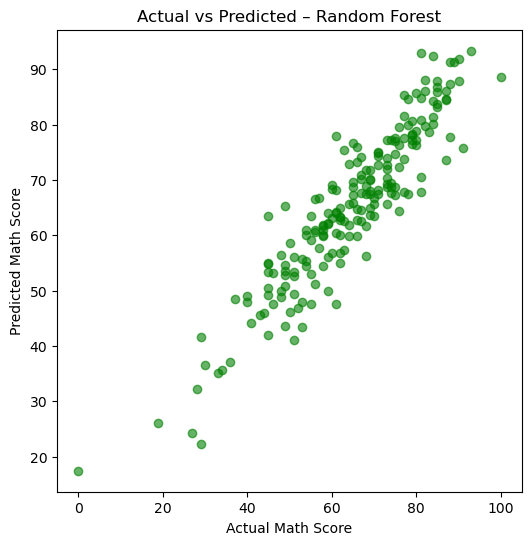

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="green")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted – Random Forest")
plt.show()

Feature Importance Bar Chart

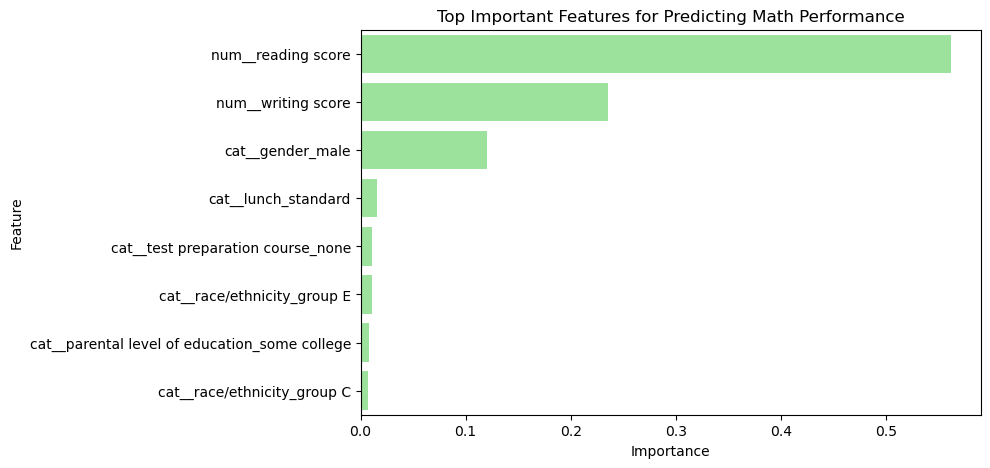

In [66]:
# Get feature names after preprocessing
feature_names = rf_model.named_steps["preprocess"].get_feature_names_out()

# Get importance values
importances = rf_model.named_steps["model"].feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(8),
    color="lightgreen"
)
plt.title("Top Important Features for Predicting Math Performance")
plt.show()